# Steam Game Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bestSelling_games.csv')

In [3]:
df.head()

,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: float64(2), int64(6), object(7)
mem

In [5]:
df.isnull().sum()

game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['release_date']=pd.to_datetime(df['release_date'])

Since the data was clear enough to be processed, let's get to the analysis. 

In [8]:
df.describe()

,reviews_like_rate,all_reviews_number,release_date,price,age_restriction,rating,difficulty,length,estimated_downloads
count,2380.000000,2.380000e+03,2380,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2.380000e+03
mean,82.413445,3.161508e+04,2020-11-22 23:42:27.226890752,10.509130,10.605462,3.228017,2.864706,22.965126,2.523007e+06
min,20.000000,1.000000e+01,1994-08-03 00:00:00,0.000000,0.000000,0.390000,1.000000,1.000000,9.000000e+01
25%,76.000000,3.420000e+02,2018-08-07 18:00:00,2.990000,10.000000,2.750000,2.000000,6.000000,3.500000e+04
50%,85.000000,2.106500e+03,2022-07-04 00:00:00,7.990000,13.000000,3.380000,3.000000,16.000000,2.171500e+05
75%,92.000000,1.303000e+04,2024-07-17 06:00:00,12.490000,17.000000,3.810000,3.000000,34.000000,1.380000e+06
max,100.000000,8.803754e+06,2025-05-30 00:00:00,79.990000,17.000000,4.830000,5.000000,80.000000,3.061700e+08
std,12.643745,2.137197e+05,NaN,11.344576,6.395752,0.771203,0.975194,21.247556,1.118283e+07


## Explanatory Data Analysis

### What's the correlation between these variables? (reviews_like_rate, all_reviews_number, price, age_restriction, rating, difficulty, length, estimated_downloads)

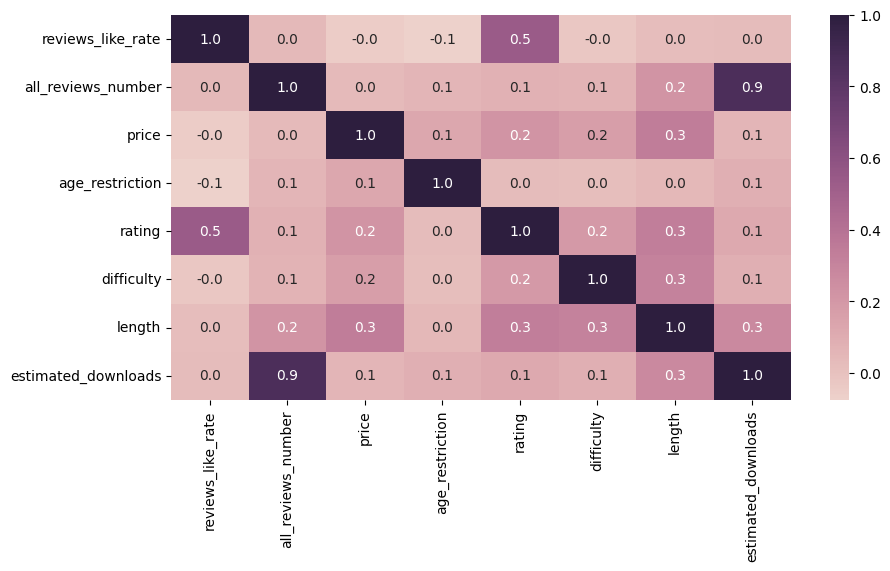

In [9]:
num_data = ['reviews_like_rate', 'all_reviews_number', 'price', 'age_restriction', 'rating', 'difficulty', 'length', 'estimated_downloads']
df_num = df[num_data]
corr_matrix = df_num.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

From the visualization above, we can see these variables:
- all reviews number with estimated downloads = 0.9
- rating with reviews_like_rate = 0.5
- price with length = 0.3
- rating with length = 0.3
- length with estimated downloads = 0.3
- length with difficulty = 0.3


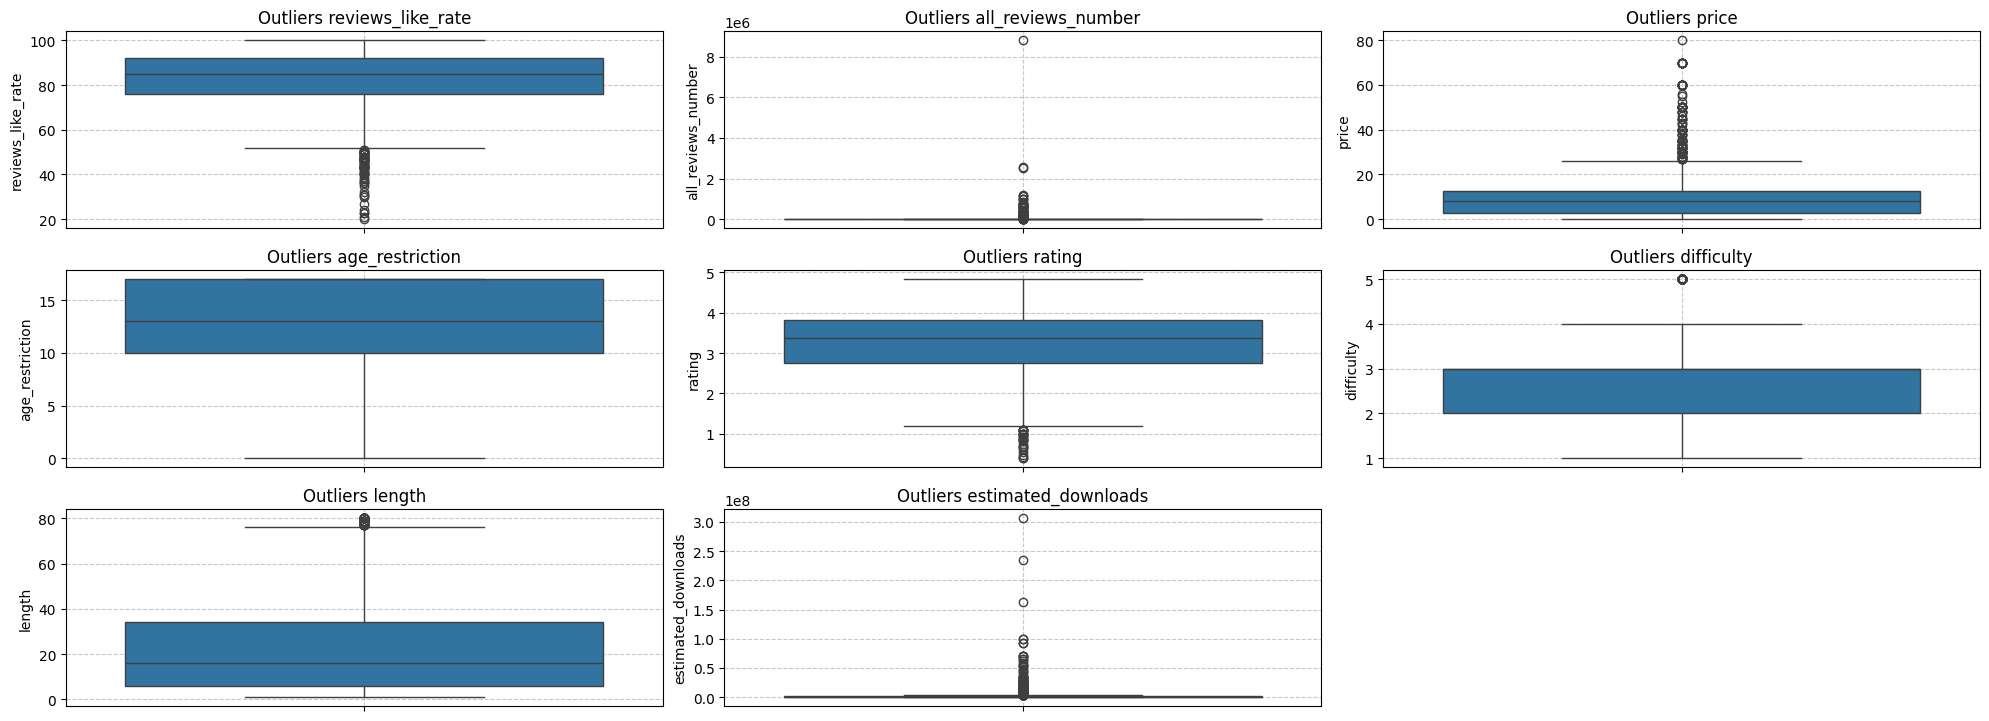

In [10]:
num_list = df_num.columns.to_list()
num_plots = len(num_list)
num_cols = 3
num_rows = (num_plots+num_cols-1)

plt.figure(figsize=(num_rows*2, num_cols*8))
for i, col in enumerate(num_list):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df_num[col])
    plt.title(f'Outliers {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\kiara\AppData\Local\Temp\ipykernel_31848\2612475429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviews, x='all_reviews_number', y='game_name', ax=axes[0], palette='Blues_d')
C:\Users\kiara\AppData\Local\Temp\ipykernel_31848\2612475429.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_downloads, x='estimated_downloads', y='game_name', ax=axes[1], palette='Greens_d')
C:\Users\kiara\AppData\Local\Temp\ipykernel_31848\2612475429.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_price, x='price',

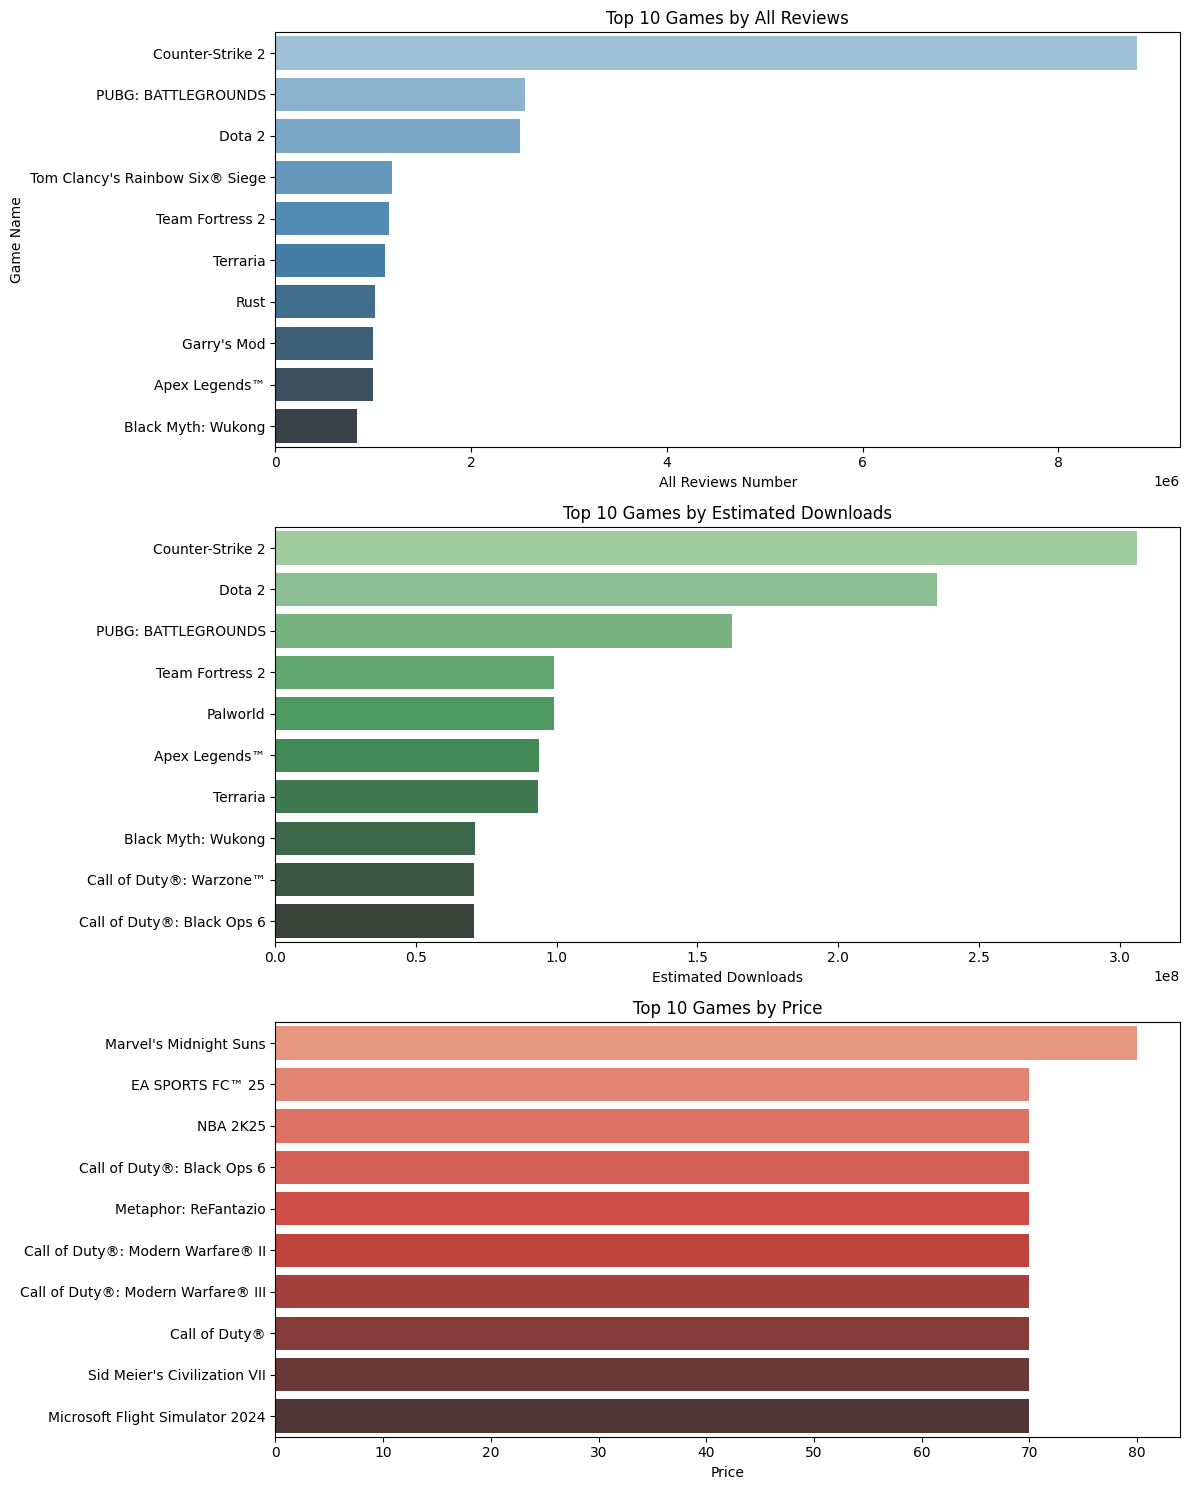

In [11]:
top_reviews = df.nlargest(10, 'all_reviews_number')[['game_name', 'all_reviews_number']]
top_downloads = df.nlargest(10, 'estimated_downloads')[['game_name', 'estimated_downloads']]
top_price = df.nlargest(10, 'price')[['game_name', 'price']]

fig, axes = plt.subplots(3, 1, figsize=(12,15))

# Plot top reviews
sns.barplot(data=top_reviews, x='all_reviews_number', y='game_name', ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Games by All Reviews')
axes[0].set_xlabel('All Reviews Number')
axes[0].set_ylabel('Game Name')

# Plot top downloads
sns.barplot(data=top_downloads, x='estimated_downloads', y='game_name', ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 10 Games by Estimated Downloads')
axes[1].set_xlabel('Estimated Downloads')
axes[1].set_ylabel('')

# Plot top price
sns.barplot(data=top_price, x='price', y='game_name', ax=axes[2], palette='Reds_d')
axes[2].set_title('Top 10 Games by Price')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

Upon closer inspection, I found that the variables 'price,' 'estimated downloads,' and 'reviews' indeed contain the most outliers. However, after cross-referencing these outliers with the specific game names, it appears that these higher prices are actually legitimate for those particular games, which are known to be expensive titles. So, i'll not take any action to do with the outliers.

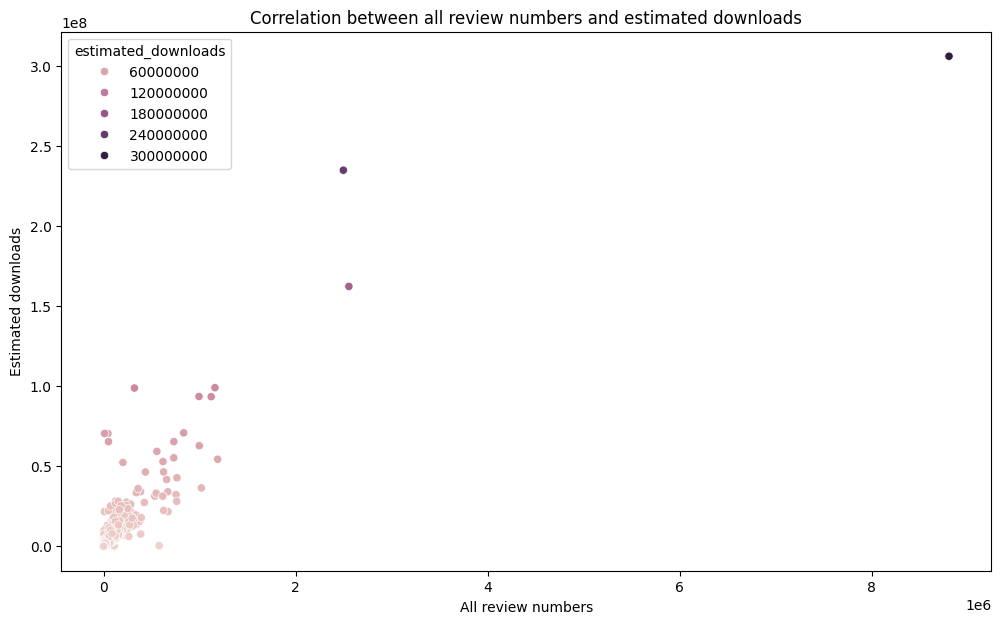

In [13]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df_num, x='all_reviews_number', y='estimated_downloads', hue='estimated_downloads')
plt.title('Correlation between all review numbers and estimated downloads')
plt.xlabel('All review numbers')
plt.ylabel('Estimated downloads')
plt.show()